# Deep Learning - Mid-Course Test - Problem Statement 2.

# 1st Task - The objective is to detect Moving Cars in a video file using OpenCV using the HaarCascade_car.xml file

**Video File path : https://drive.google.com/file/d/14T39oL5ntfVkqzC_SjSRl3yksbn_lTkD/view?usp=sharing

**Importing Libraries and creatimg model using Classifier "HaarCascade_car xml file."

In [15]:
# -*- coding: utf-8 -*-

import cv2
print(cv2.__version__)

cascade_src = 'haarcascade_car.xml'
video_src = 'cars.mp4'
#video_src = 'cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)

while True:
    ret, img = cap.read()
    if (type(img) == type(None)):
        break
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)      
    
    cv2.imshow('video', img)
    
    if cv2.waitKey(33) == 27:
        break

cv2.destroyAllWindows()

4.5.3


# 2nd Task - The objective is to detect Car License Plates using the Classifier "HaarCascade_russian_plate_number.xml file."

**Importing Libraries.**

In [6]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Image.**

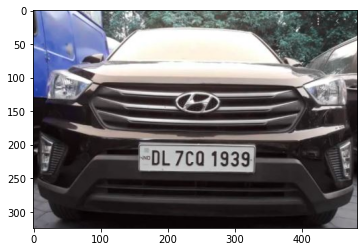

In [7]:
img = cv2.imread('Number Plate.jpg')
plt.imshow(img)

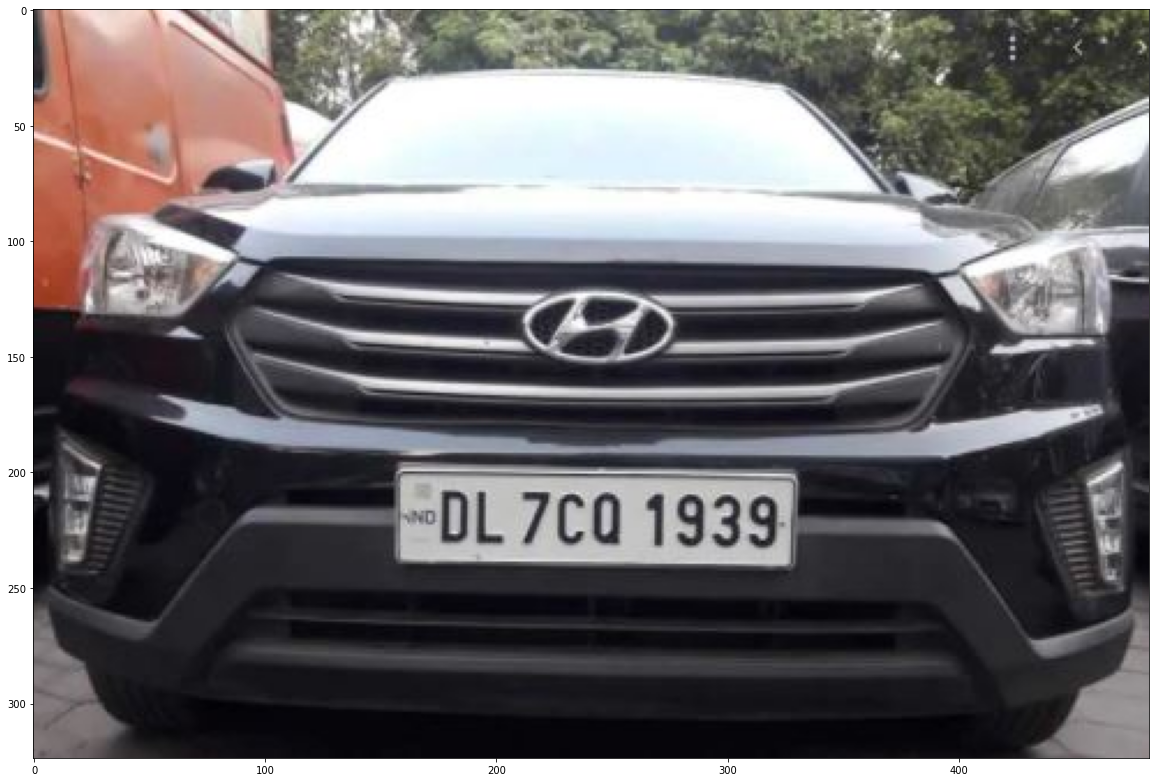

In [8]:
#I will make a bit larger so you can compare this with the final swapped plate image
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

**processing and creatimg model using Classifier "HaarCascade_russian_plate_number.xml file."

In [9]:
pretrained = 'haarcascade_russian_plate_number.xml'

In [10]:
#converting the image to grayscale is needed for detection by the classifier
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#create a trained classifier object with the xml file
plate_cascade = cv2.CascadeClassifier(pretrained)

#detect the plate with the classifier
plate = plate_cascade.detectMultiScale(gray, scaleFactor = 1.05, minNeighbors = 5, minSize = (40,40))
    
#opting to print bounding boxes to console; this is useful for the plates defined later on -- will hard code this manually
print(plate)

[[152 181 215  72]
 [ 57 162 291  97]]


**Detect the Car License Plate using the Classifier and Displaying the Result.**

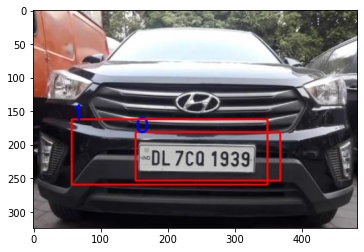

In [12]:
count = 0

#draw a rectangle around each detected plate with the list of returned bounding box coordinates
#don't want to overwrite the original image
detected_img = img

for (x, y, w, h) in plate:
    cv2.rectangle(detected_img, (x,y), (x + w, y + h), (0,0,255), 2) #red bounding box
    cv2.putText(detected_img, str(count), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    count+=1
    
#let's see what plates were detected; remember to reverse the color order
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))